In [5]:
import scanpy, phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scprep
import meld

In [8]:
adata = scanpy.read_h5ad('../analysis_all_cells/data/all_exocrine_endocrine_processed.h5ad')

In [9]:
adata.var_names_make_unique()

In [15]:
adata_acinar = adata[adata.obs['clusters'] == 4]

In [23]:
gene_subset_only = ["Ins1", 'Ins2', 'Sst', 'Ppy', 'Gcg']
phate_op = phate.PHATE(random_state=42, verbose=True)
adata_acinar.obsm['X_phate'] = phate_op.fit_transform(adata_acinar[:, ~adata_acinar.var['names'].isin(gene_subset_only)].to_df())
adata_acinar.obsm['X_phate'][:, 0] = -1*adata_acinar.obsm['X_phate'][:, 0]
adata_acinar.obsm['X_phate'][:, 1] = -1*adata_acinar.obsm['X_phate'][:, 1]

Calculating PHATE...
  Running PHATE on 260 observations and 16478 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.48 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.05 seconds.
Calculated PHATE in 0.72 seconds.


In [29]:
usamples = ["CG10_wt", "CG5_ob/ob", "CG4_wt", "CG11-hfd"]
lut = {usamples[i]: plt.get_cmap("tab10")(i) for i in range(4)}

<Axes: title={'center': 'Acinar cells'}>

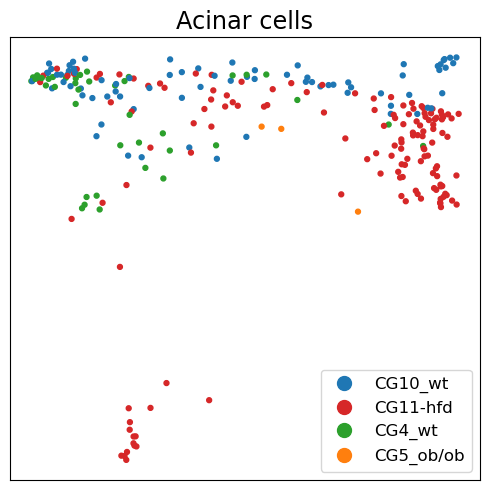

In [31]:
scprep.plot.scatter2d(adata_acinar.obsm['X_phate'], c=adata_acinar.obs['sample'],
                      cmap=[plt.get_cmap("tab10")(i) for i in [0,3,2,1]], dpi=300, ticks=None,
                      title='Acinar cells', figsize=(5,5),
                      filename='acinar_cells_by_sample.png')

<Axes: title={'center': 'Acinar cells'}>

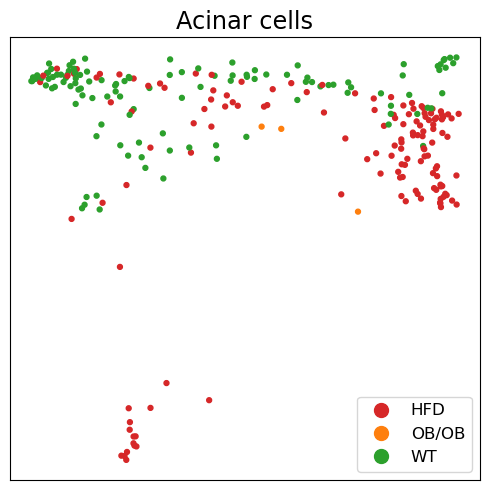

In [32]:
conversion_dict_1 = {'CG4_wt': 'WT', 'CG10_wt': 'WT', 'CG11-hfd': 'HFD', 'CG5_ob/ob': 'OB/OB'}
scprep.plot.scatter2d(adata_acinar.obsm['X_phate'], c=adata_acinar.obs['sample'].map(conversion_dict_1),
                      cmap=[plt.get_cmap("tab10")(i) for i in [3,1,2]], dpi=300, ticks=None,
                      title='Acinar cells', figsize=(5,5),
                      filename='acinar_cells_by_condition.png')

In [33]:
conversion_dict = {'CG4_wt': 'WT', 'CG10_wt': 'WT', 'CG5_ob/ob': 'HFD/OBOB', 'CG11-hfd': 'HFD/OBOB'}
adata_acinar.obs['sample_group'] = adata_acinar.obs['sample'].map(conversion_dict)

In [35]:
clustering = phate.cluster.kmeans(phate_op, n_clusters=3, random_state=42)
adata_acinar.obs['clusters'] = pd.Series(clustering, index=adata_acinar.obs_names).astype('category')

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
adata_acinar.var["mt"] = adata_acinar.var['names'].str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(adata_acinar, qc_vars=["mt"], percent_top=None, inplace=True)

In [38]:
adata_acinar.write('data/adata_acinar.h5ad')